In [1]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [2]:
importlib.reload(EyeTraumaAnalysis);

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2

In [4]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=10,
    wd_px=20,
    center=image.center, borderValue=(0,0,0,0) )

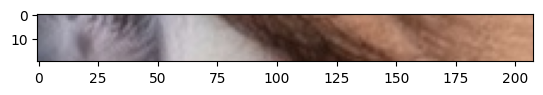

In [5]:
segment = segments[0]
plt.imshow(segment)

In [6]:
import PIL.Image as pilimg
rgb_segment = pilimg.fromarray(segment)

In [7]:
pil_image = rgb_segment.convert('RGB')
open_cv_image = np.array(pil_image)
# Convert RGB to BGR
opencv_segment = open_cv_image[:, :, ::-1].copy()

In [8]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
# pixel_vals = segment.reshape((-1,3))
pixel_vals = segment[:,:,:3]
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

In [9]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.8)
k = 5 # Choosing number of cluster
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

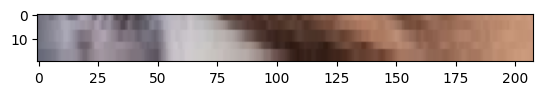

In [13]:
centers = np.uint8(centers) # convert data into 8-bit values
segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((opencv_segment.shape)) # reshape data into the original image dimensions

# segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
plt.imshow(segmented_image, cmap='gray', vmin=0, vmax=255)

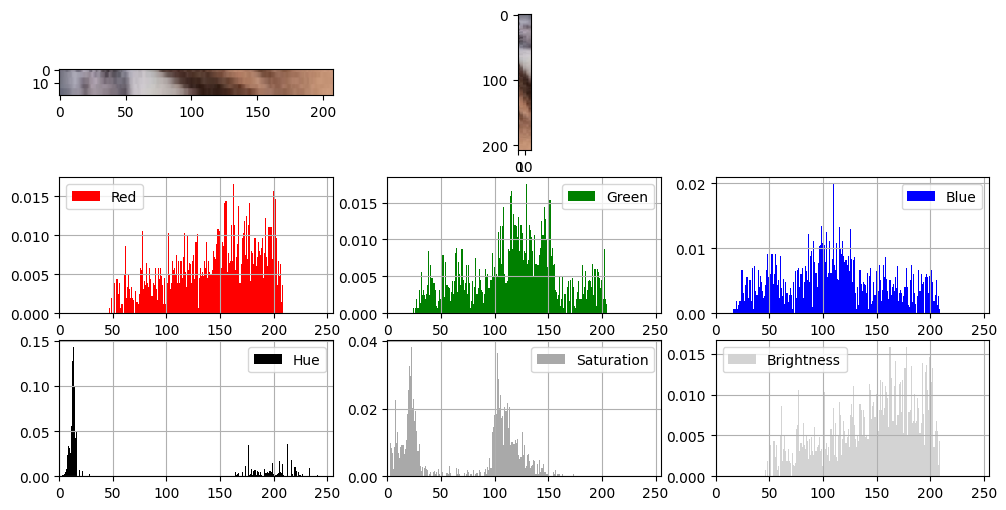

In [11]:
image = segmented_image

img_hsv = mpl.colors.rgb_to_hsv(segmented_image[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, figsize=(12,6))

axs[0,0].imshow(image)

axs[0,1].imshow(np.transpose(segmented_image, axes=[1,0,2]))
axs[0,2].axis("off")

axs[1,0].hist(image[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red");
axs[1,1].hist(image[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green");
axs[1,2].hist(image[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue");

axs[2,0].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, facecolor="black", label="Hue");
axs[2,1].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation");
axs[2,2].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, facecolor="lightgray", label="Brightness");

for ind, ax in enumerate(axs[1:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()